In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('example_raw_data.csv')

In [21]:
df.head()

,Unnamed: 0,date,names,locs,tweet_texts,topics,links,linked_text,politics_score,liked
0,0,1-Apr,The New York Times,New York City,The New York Mets’ season-opening game against...,"sports, US",NaN,NaN,-1.0,1.0
1,1,1-Apr,The Washington Post,"Washington, DC",Opinion: How Nancy Reagan helped end the Cold ...,"history, US",https://wapo.st/3m9QtWK,NaN,-1.0,0.0
2,2,1-Apr,BBC News (World),"London, UK",Derek Chauvin trial: George Floyd's girlfriend...,"US, inequality, crime",https://bbc.in/3fzMAcj,NaN,0.0,0.0
3,3,1-Apr,The Guardian,London,The Unholy review – Satan continues to inspire...,"film, entertainment",https://www.theguardian.com/film/2021/apr/01/t...,NaN,-2.0,0.0
4,4,1-Apr,Karen Hao,EST,Oh hey my promotion is official today! I'm thr...,career,NaN,NaN,NaN,0.0


# Topics

In [22]:
topics = df[df['topics'].notna()]
topics.head()

,Unnamed: 0,date,names,locs,tweet_texts,topics,links,linked_text,politics_score,liked
0,0,1-Apr,The New York Times,New York City,The New York Mets’ season-opening game against...,"sports, US",NaN,NaN,-1.0,1.0
1,1,1-Apr,The Washington Post,"Washington, DC",Opinion: How Nancy Reagan helped end the Cold ...,"history, US",https://wapo.st/3m9QtWK,NaN,-1.0,0.0
2,2,1-Apr,BBC News (World),"London, UK",Derek Chauvin trial: George Floyd's girlfriend...,"US, inequality, crime",https://bbc.in/3fzMAcj,NaN,0.0,0.0
3,3,1-Apr,The Guardian,London,The Unholy review – Satan continues to inspire...,"film, entertainment",https://www.theguardian.com/film/2021/apr/01/t...,NaN,-2.0,0.0
4,4,1-Apr,Karen Hao,EST,Oh hey my promotion is official today! I'm thr...,career,NaN,NaN,NaN,0.0


In [23]:
topics_separated = topics["topics"].str.get_dummies(sep=', ')
topics_separated.loc['Total']= topics_separated.sum()

In [24]:
topics_separated

,UK,US,career,china,coronavirus,crime,education,entertainment,film,health,history,inequality,opinion piece,politics,schools,sport,sports,technology,transport
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


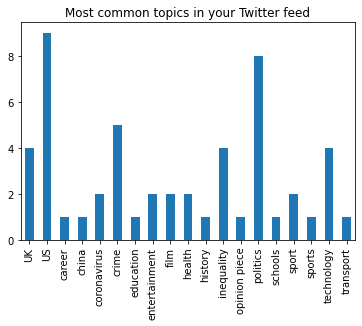

In [25]:
ax = topics_separated.loc['Total'].plot.bar().set_title('Most common topics in your Twitter feed')

In [26]:
to_display = topics_separated.T.sort_values('Total', ascending=False).T.iloc[:,:5]

In [27]:
to_display

,US,politics,crime,UK,technology
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,1,1,0,0,0
6,0,1,0,1,0
7,0,0,1,0,0
8,0,0,0,0,0
9,1,0,0,0,0


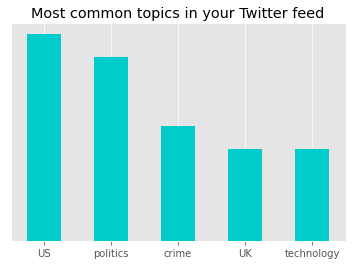

In [56]:
plt.style.use('ggplot')
to_display.loc['Total'].plot.bar(color='#00CCCC').set_title('Most common topics in your Twitter feed')
plt.yticks([]);
plt.xticks(rotation=0, horizontalalignment="center");
plt.savefig('topics.png')

# Political alignment

In [29]:
politics =  df[df['politics_score'].notna()] 
politics = politics.astype({'politics_score': 'int64'})
politics.head()

,Unnamed: 0,date,names,locs,tweet_texts,topics,links,linked_text,politics_score,liked
0,0,1-Apr,The New York Times,New York City,The New York Mets’ season-opening game against...,"sports, US",NaN,NaN,-1,1.0
1,1,1-Apr,The Washington Post,"Washington, DC",Opinion: How Nancy Reagan helped end the Cold ...,"history, US",https://wapo.st/3m9QtWK,NaN,-1,0.0
2,2,1-Apr,BBC News (World),"London, UK",Derek Chauvin trial: George Floyd's girlfriend...,"US, inequality, crime",https://bbc.in/3fzMAcj,NaN,0,0.0
3,3,1-Apr,The Guardian,London,The Unholy review – Satan continues to inspire...,"film, entertainment",https://www.theguardian.com/film/2021/apr/01/t...,NaN,-2,0.0
5,5,1-Apr,The New York Times,New York City,President Biden said that the Texas Rangers’ d...,"US, politics, sport",NaN,NaN,-1,0.0


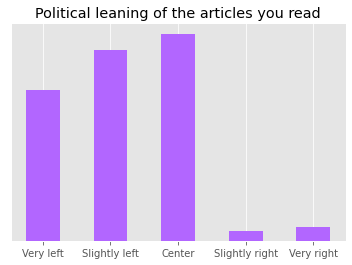

In [63]:
bins = [-2.5, -1.5, -0.5, 0.5, 1.5,2.5]
politics['politics_score'].hist(bins=bins,rwidth=0.5,color='#B266FF').set_title('Political leaning of the articles you read')
plt.yticks([]);

plt.xticks(range(-2,3),['Very left', 'Slightly left', 'Center', 'Slightly right', 'Very right'], horizontalalignment="center");
plt.savefig('politics.png')

In [31]:
alignment = politics['politics_score'].mean()

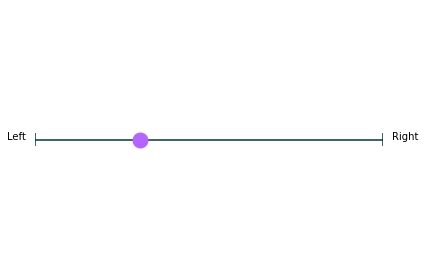

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0,4)
ax.set_ylim(0,10)

# draw lines
xmin = 0
xmax = 4
y = 5
height = .5

plt.hlines(y, xmin, xmax, colors='#003333')
plt.vlines(xmin, y - height / 2., y + height / 2., colors='#003333')
plt.vlines(xmax, y - height / 2., y + height / 2., colors='#003333')

# draw a point on the line
px = alignment + 2
plt.plot(px,y, color = '#B266FF', marker = 'o', ms = 15, mfc = '#B266FF')

# # # add an arrow
# plt.annotate('This is where you lie in the polical spectrum', (px,y), xytext = (px - 1, y + 1),
#               arrowprops=dict(facecolor='black', shrink=0.1),
#               horizontalalignment='right')

# add numbers
plt.text(xmin - 0.1, y, 'Left', horizontalalignment='right')
plt.text(xmax + 0.1, y, 'Right', horizontalalignment='left')

plt.axis('off')
plt.tight_layout()
plt.savefig('alignment.png', transparent=True)
plt.show()